In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn #importando o sklearn

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [3]:
df = pd.read_csv(r'C:\Users\matheus.frias\Downloads\Chapter_1_cleaned_data.csv') #puxando o dado csv

In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()


default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression #importando o LogisticRegression

In [7]:
my_lr = LogisticRegression(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)) #instanciando uma classe em um objeto

In [8]:
my_lr

LogisticRegression(penalty=LogisticRegression())

In [9]:
#instanciar um modelo de regressão logística com todas as opções padrão

my_new_lr = LogisticRegression()

my_new_lr.class_weight=None
my_new_lr.dual=False
my_new_lr.fit_intercept=True
my_new_lr.intercept_scaling=1
my_new_lr.max_iter=100
my_new_lr.multi_class='auto'
my_new_lr.n_jobs=None
my_new_lr.penalty='l2'
my_new_lr.random_state=None
my_new_lr.solver='warn'
my_new_lr.tol=0.0001
my_new_lr.verbose=0
my_new_lr.warm_start=False
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

In [10]:
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [11]:
X = df['EDUCATION'][0:10].values.reshape(-1,1) 

In [12]:
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [13]:
y = df['default payment next month'][0:10].values 
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
my_new_lr.fit(X, y) # ajustar nossa regressão logística

LogisticRegression(C=0.1, solver='liblinear')

In [15]:
my_new_lr.fit(X, y)


LogisticRegression(C=0.1, solver='liblinear')

In [16]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)

In [17]:
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [18]:
my_new_lr.predict(new_X) #fazer previsões

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
df['default payment next month'][10:20].values #valores verdadeiros correspondentes a essas previsões

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [20]:
np.random.seed(seed=1)

In [21]:
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))

In [22]:
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [23]:
np.random.seed(seed=1) #código para criar dados lineares com ruído gaussiano
slope=0.25
intercept=-1.25
y=slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

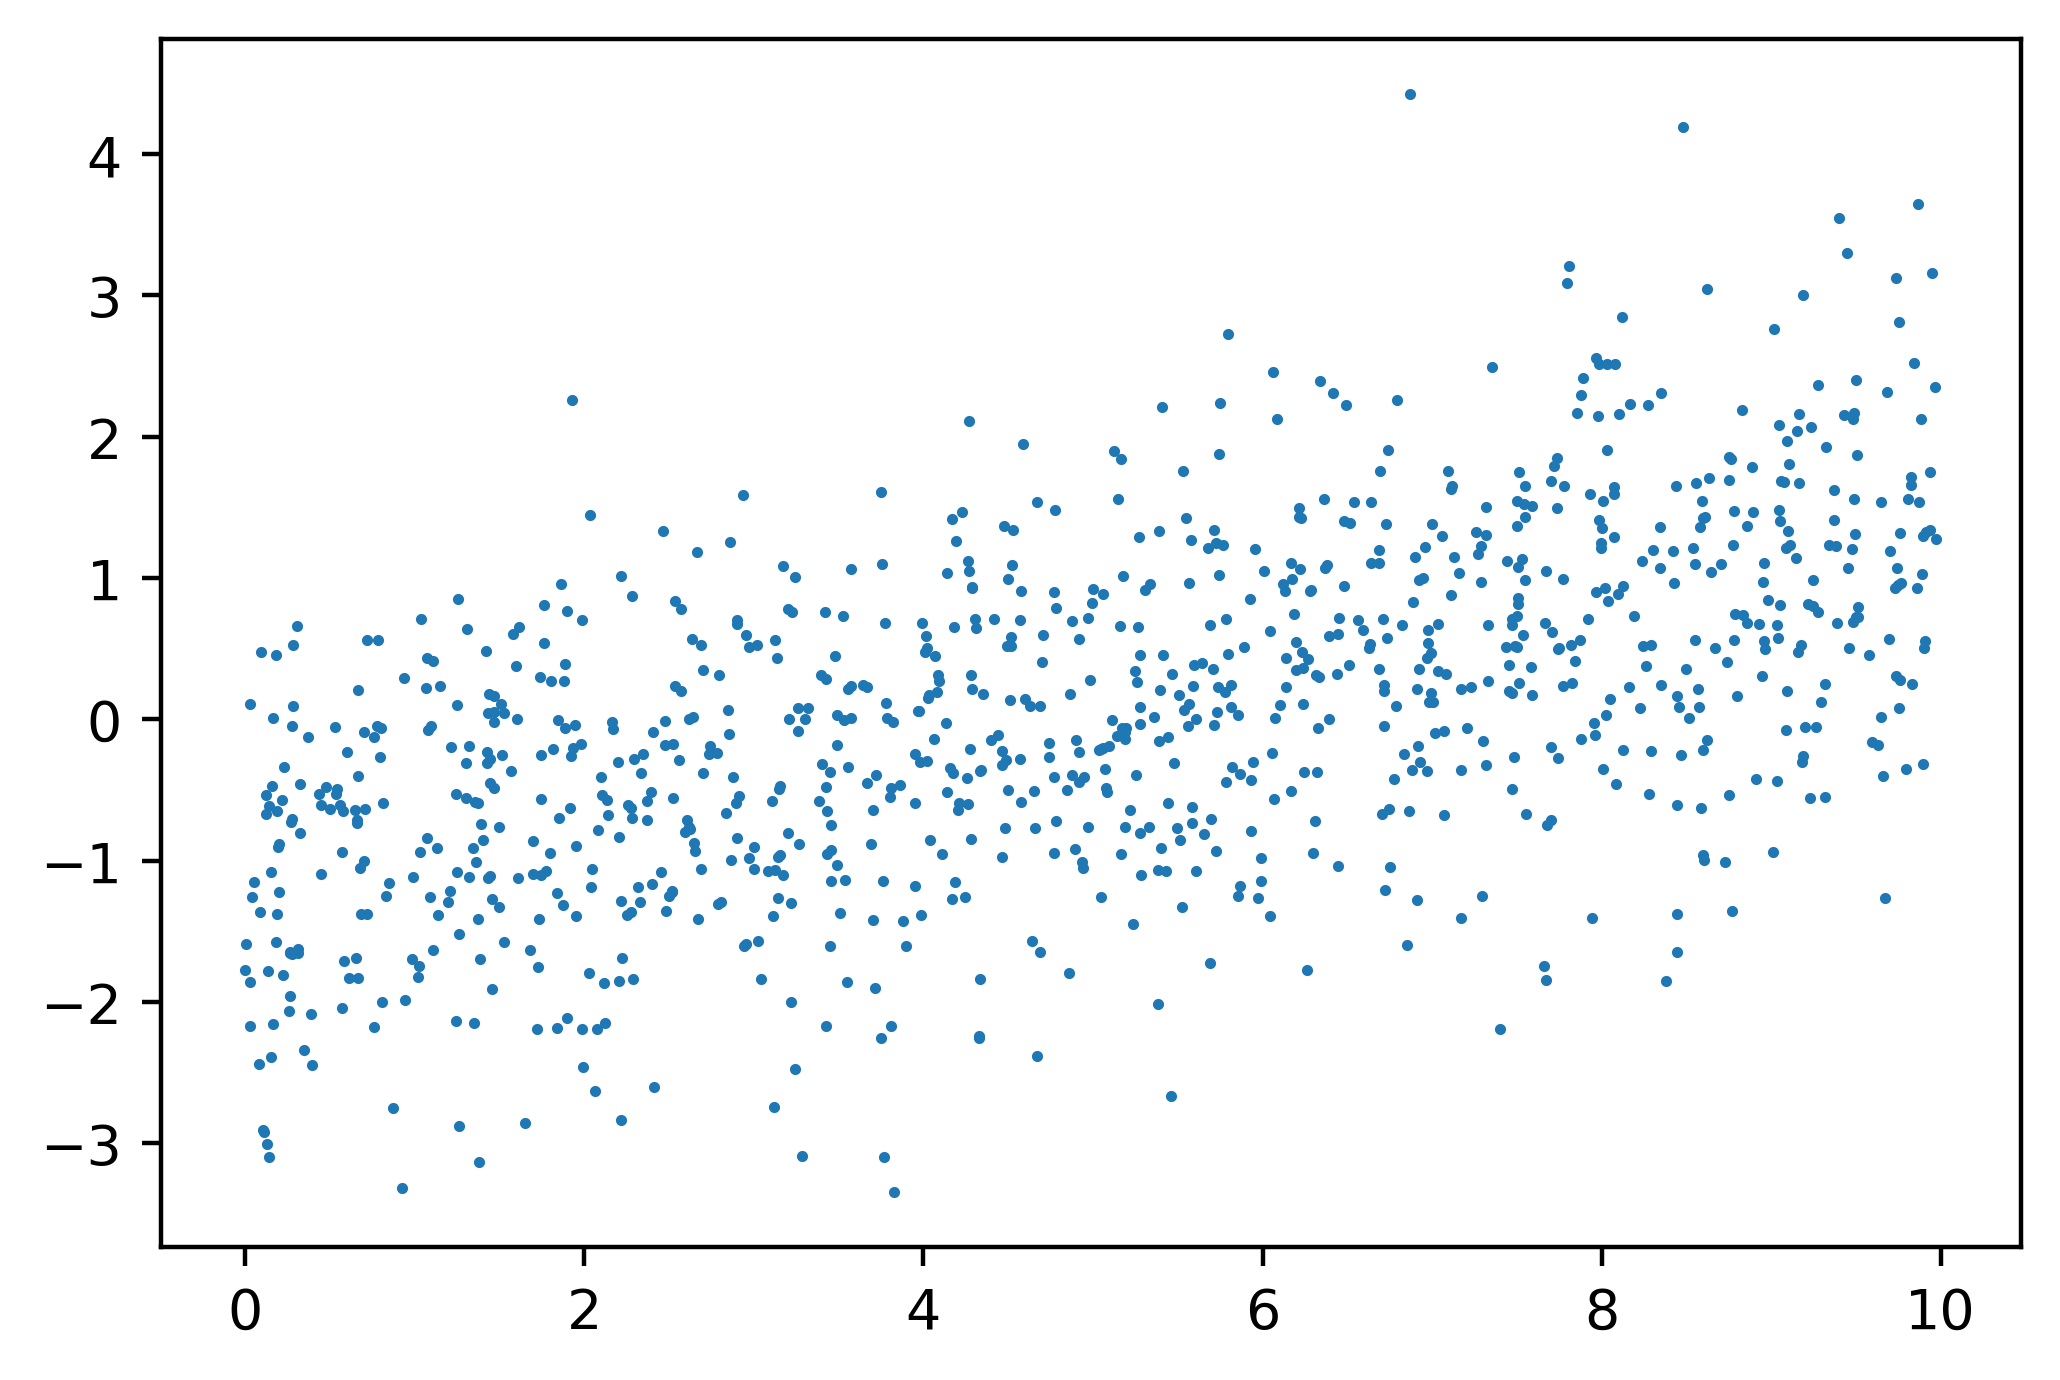

In [24]:
mpl.rcParams['figure.dpi']=400
plt.scatter(X,y,s=1)

#Exercício 8: Regressão Linear no Scikit-Learn

In [25]:
#importar a classe do modelo de regressão linear e instanciá-la
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [26]:
#ajustar o modelo e examinar os coeficientes
lin_reg.fit(X.reshape(-1,1),y)

LinearRegression()

In [27]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [28]:
y_pred=lin_reg.predict(X.reshape(-1,1)) #pegamos o resultado saide de X

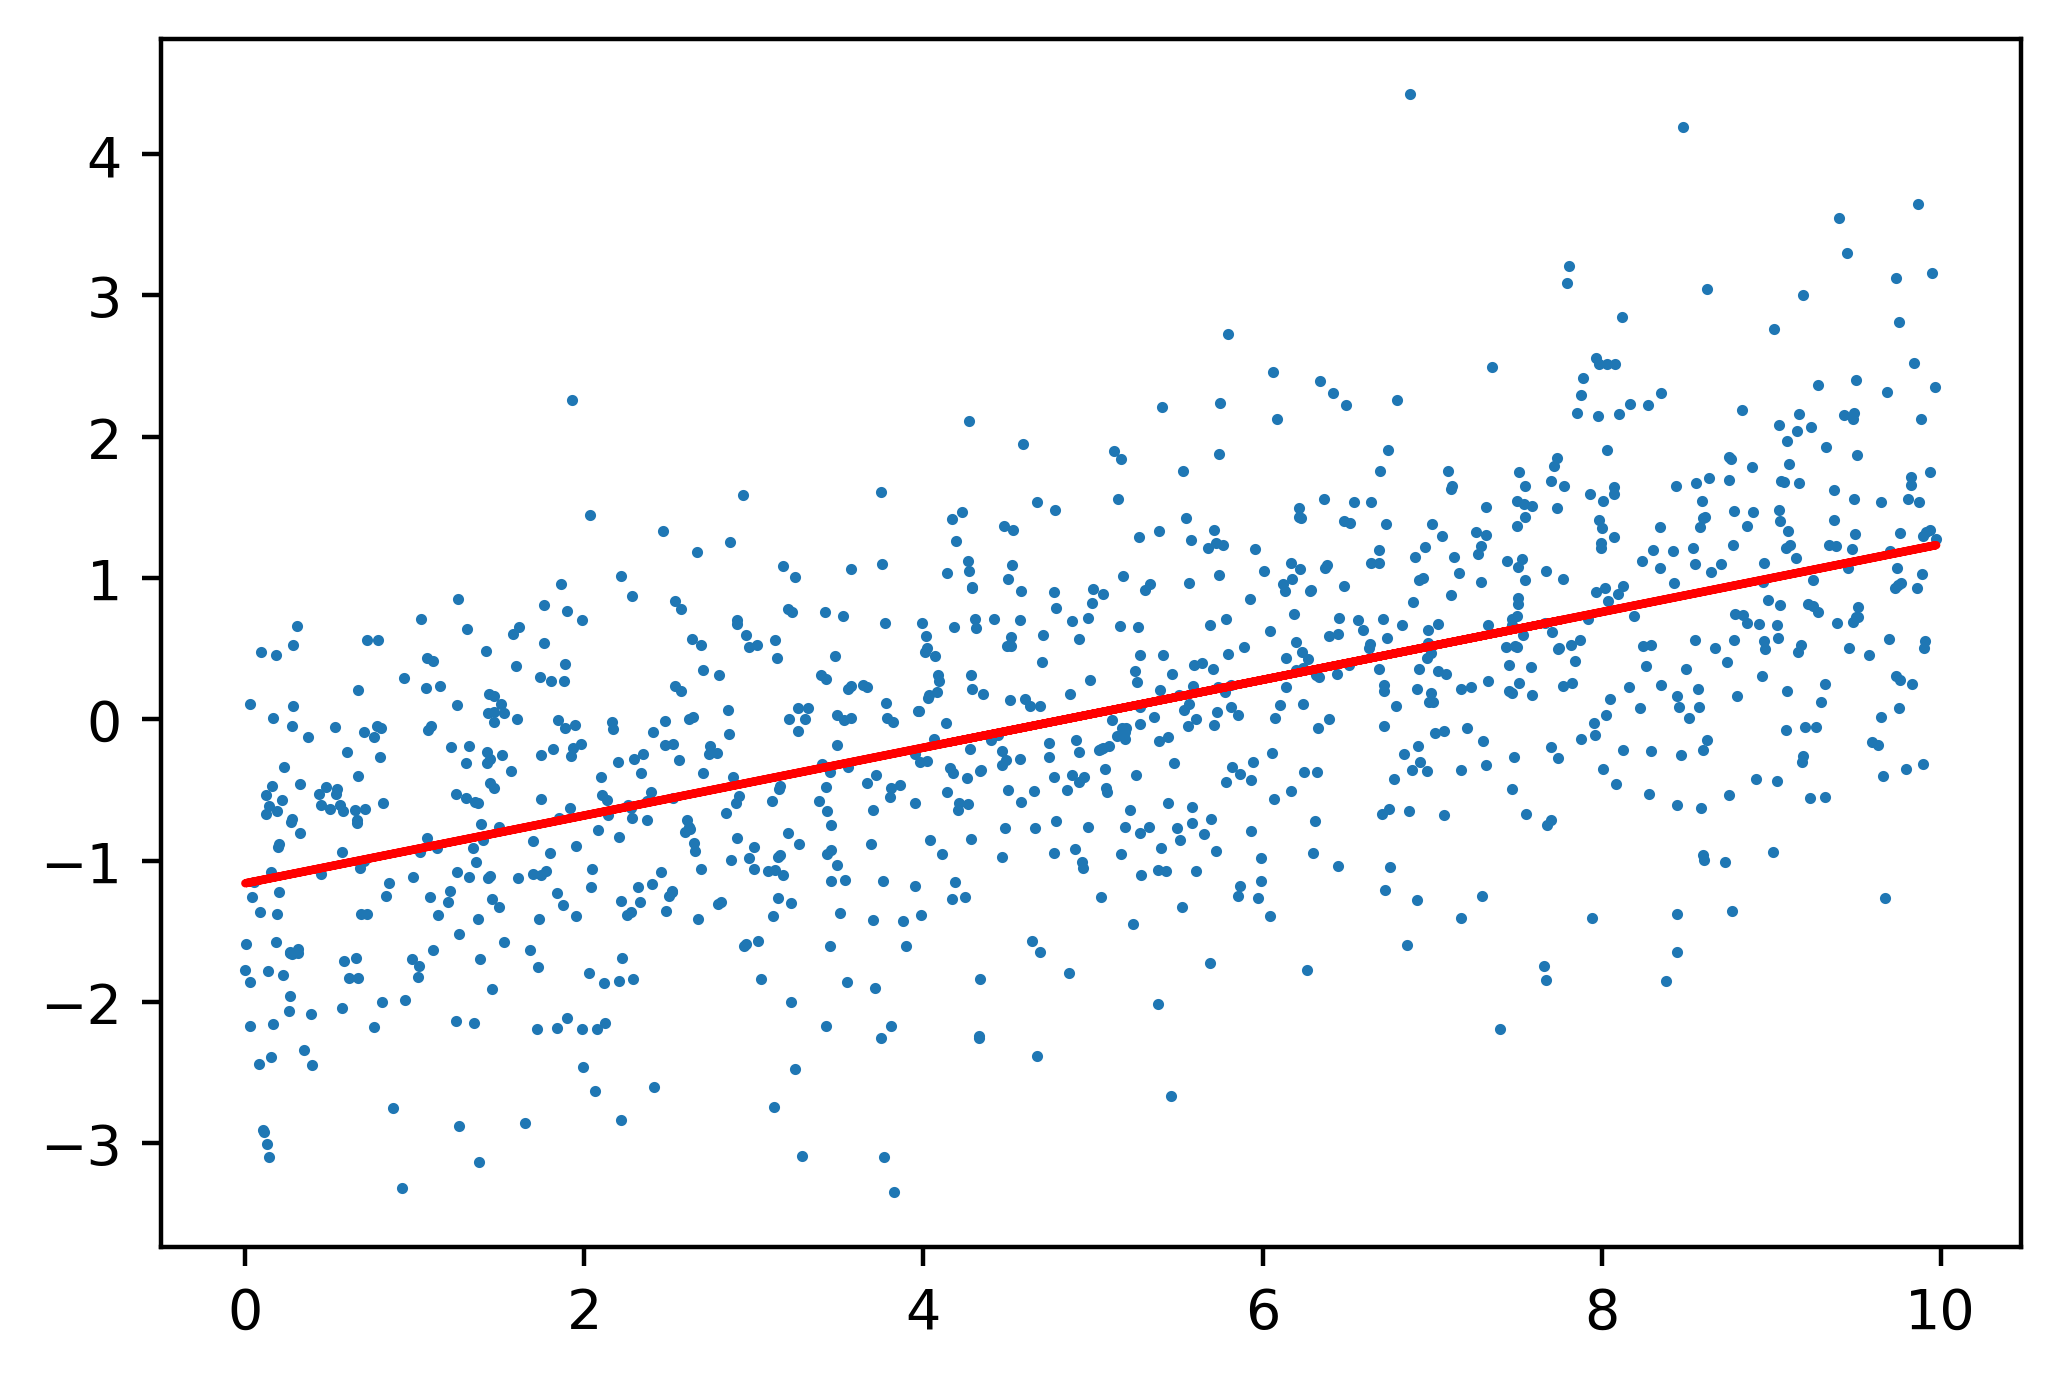

In [29]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#fazendo modelo de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), 
                                                     df['default payment next month'].values, test_size=0.2, random_state=24)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [33]:
np.mean(y_train)

0.223102526838873

In [34]:
np.mean(y_test)

0.21657603600225014

In [35]:
from sklearn.linear_model import LogisticRegression #vamos continuar usando esse modelo

In [36]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [38]:
y_pred = example_lr.predict(X_test) #Armazenamos os rótulos preditos pelo modelo do conjunto de teste em uma variável

In [39]:
#Uma maneira de calcular a precisão é criar uma máscara lógica que seja verdadeira sempre que o
#o rótulo previsto é igual ao rótulo real e, caso contrário , False
is_correct = y_pred == y_test 

In [40]:
np.mean(is_correct)

0.7834239639977498

In [42]:
#métrica para previsoes 
example_lr.score(X_test, y_test)

0.7834239639977498

In [43]:
from sklearn import metrics

In [44]:
metrics.accuracy_score(y_test, y_pred) #verefica a precisao

0.7834239639977498

In [48]:
#soma das amostras positivas
P = sum(y_test)
P

1155

In [47]:
#calculo dos numeros verdadeiro positivos (TP= true positive)
TP = sum((y_test == 1) & (y_pred == 1))
TP

0

In [49]:
#obtendo a taxa de verdadeiro positivo
TPR = TP/P
TPR

0.0

In [50]:
#agora com falso negativos
FN = sum((y_test == 1) & (y_pred == 0))
FN

1155

In [51]:
#taxa de falso negativo
FNR = FN/P
FNR

1.0

In [52]:
N = sum(y_test==0)
N

4178

In [53]:
TN = sum((y_test==0) & (y_pred==0)) #calculo dos numeros verdadeiro negativos (TP= true positive)
TN

4178

In [54]:
FP = sum((y_test==0) & (y_pred==1))#agora com falso positivo
FP

0

In [56]:
TNR = TN/N #taxa de true negative
FPR = FP/N #taxa de false positive
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [57]:
metrics.confusion_matrix(y_test, y_pred) #criando uma matriz de confusão

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [58]:
y_pred_proba = example_lr.predict_proba(X_test) #obtendo as probabilidades previstas para as amostras de teste
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [59]:
prob_sum = np.sum(y_pred_proba, 1) #Calculo da soma das probabilidades previstas para cada amostra
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [60]:
prob_sum.shape

(5333,)

In [61]:
np.unique(prob_sum) #identificando se existe apenas um elemento no array

array([1.])

In [62]:
pos_proba = y_pred_proba[:,1] #vendo a segunda coluna da matriz de probabilidade
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

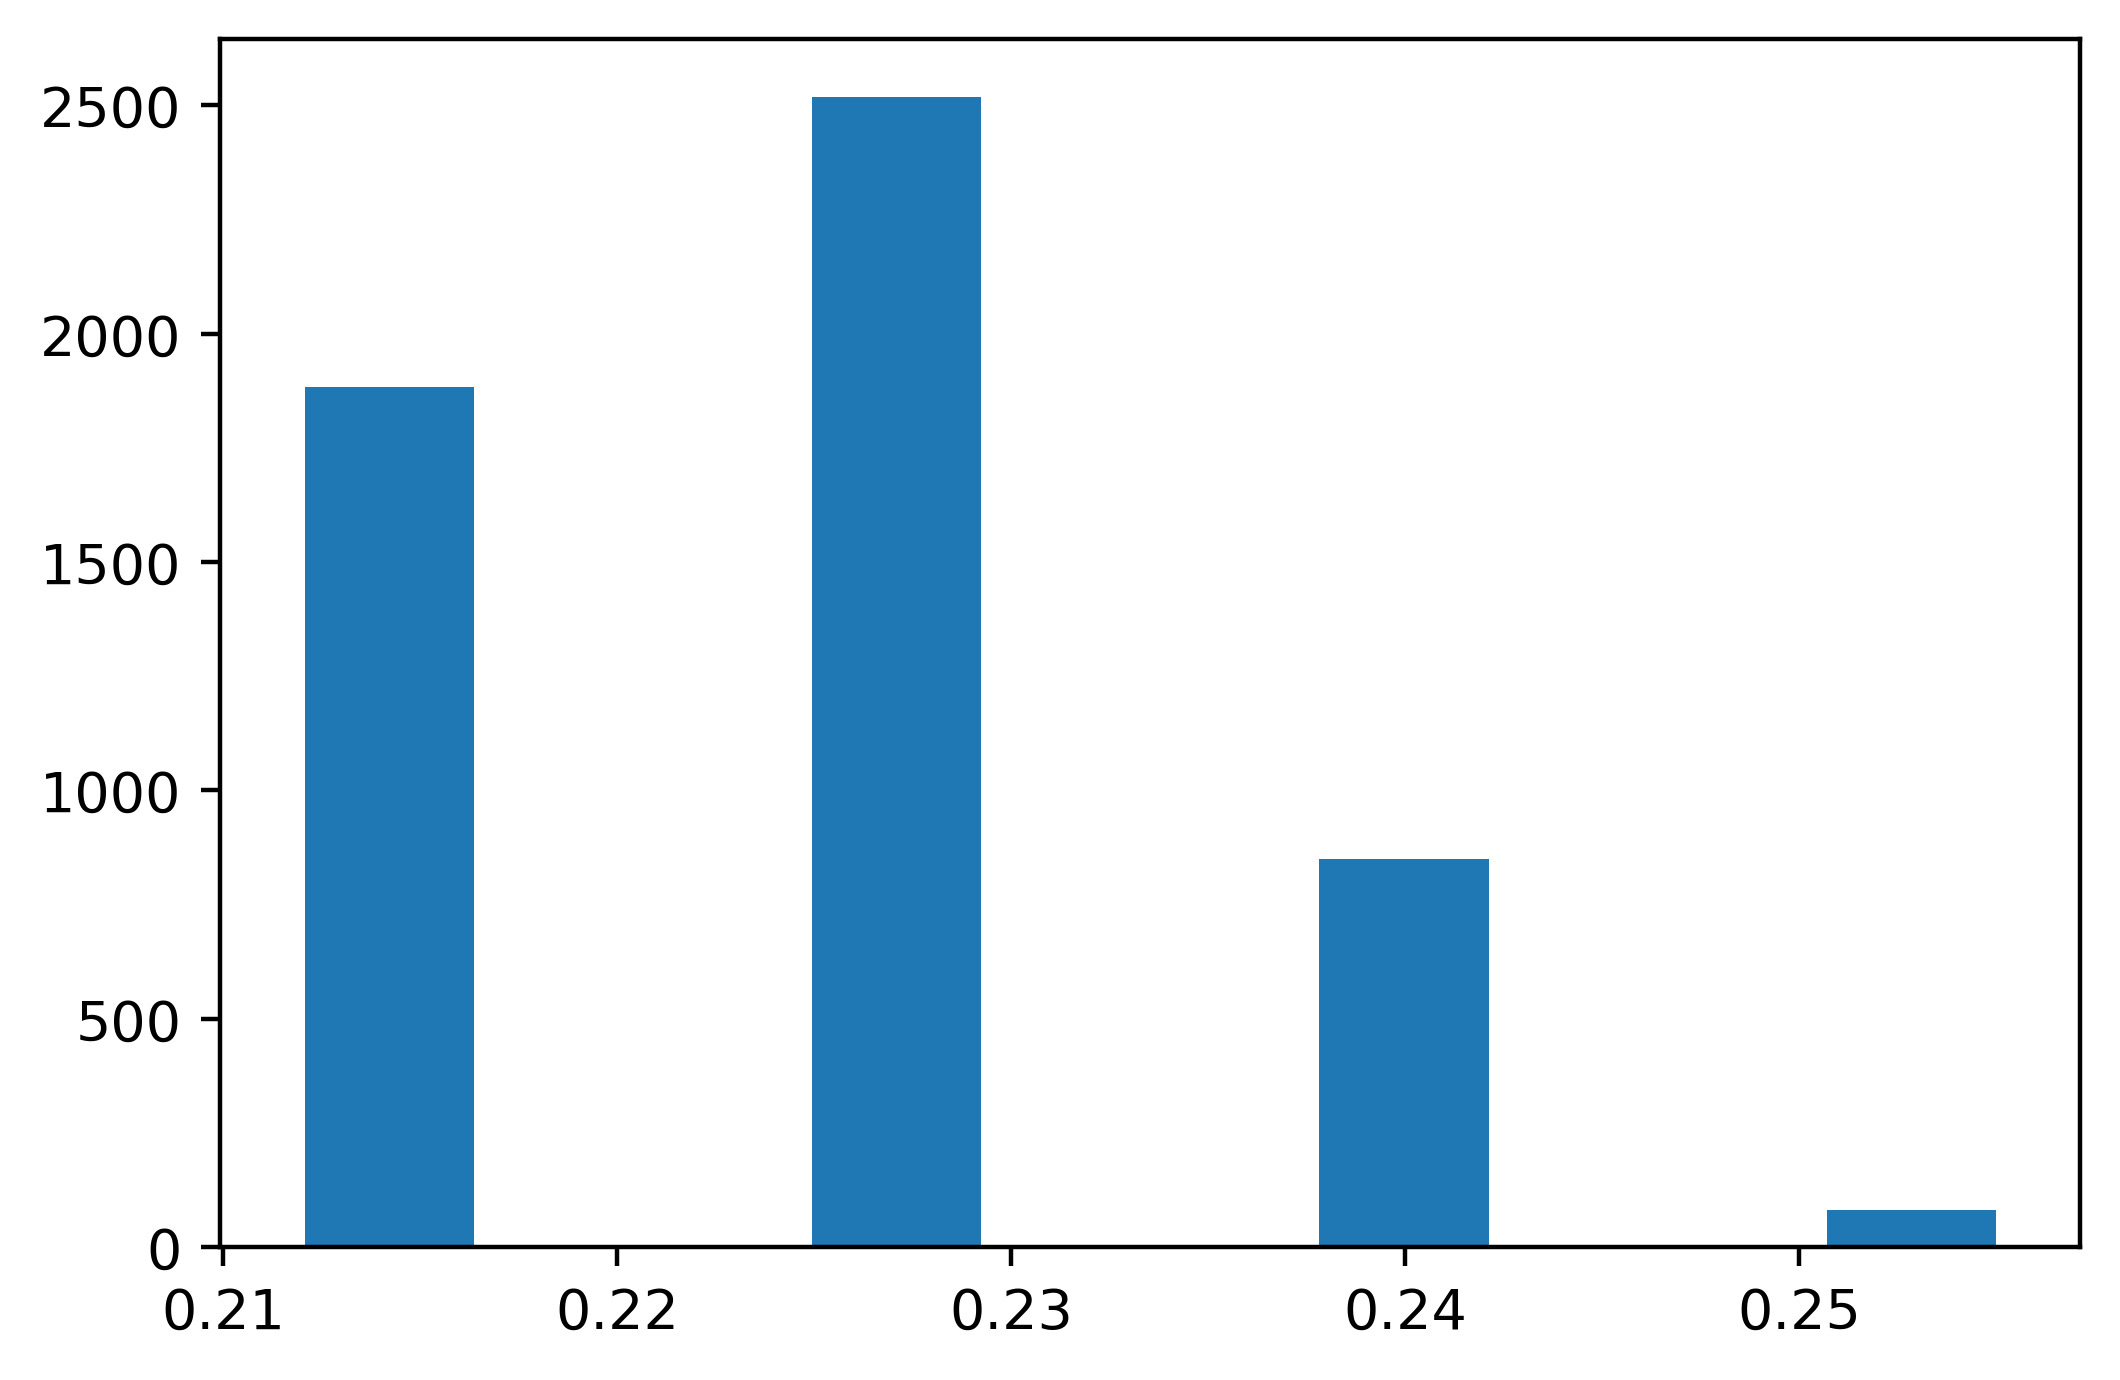

In [63]:
plt.hist(pos_proba)

Text(0, 0.5, 'Número de amostras')

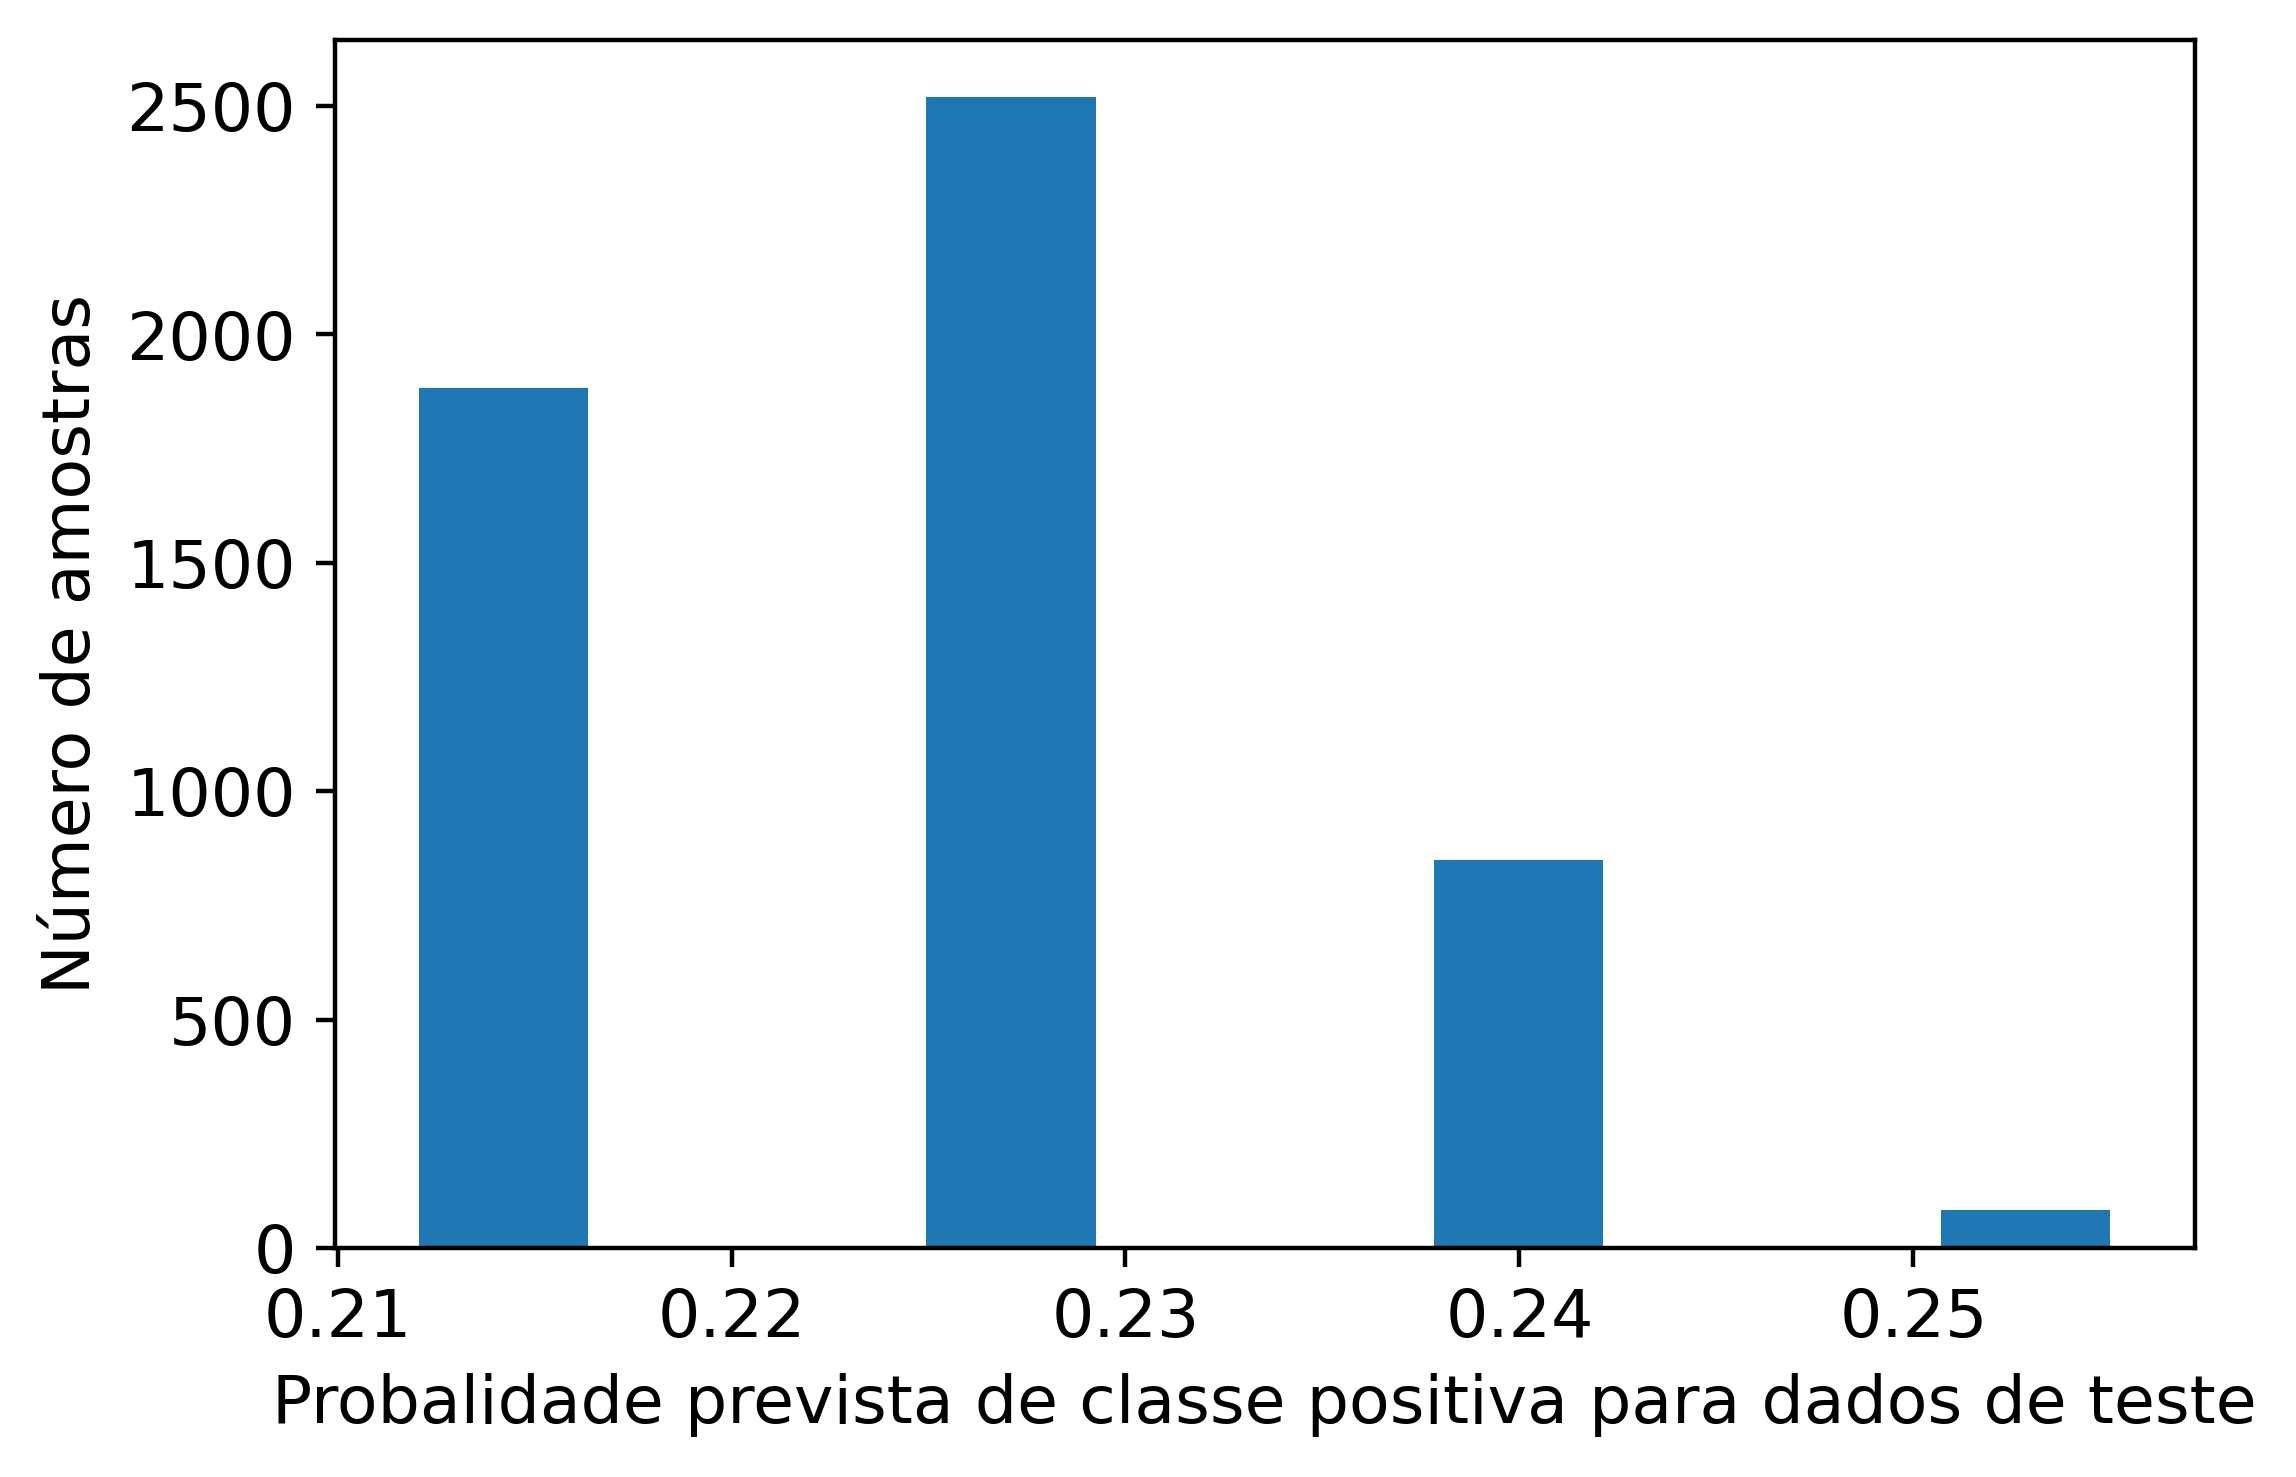

In [64]:
mpl.rcParams['font.size']=12
plt.hist(pos_proba)
plt.xlabel('Probalidade prevista de classe positiva para dados de teste')
plt.ylabel('Número de amostras')

In [65]:
#isolando as probabilidades de positivos e negativos
pos_sample_pos_proba = pos_proba [y_test == 1]#positivo
neg_sample_pos_proba = pos_proba [y_test == 0]#negativo

Text(0, 0.5, 'Número de amostras')

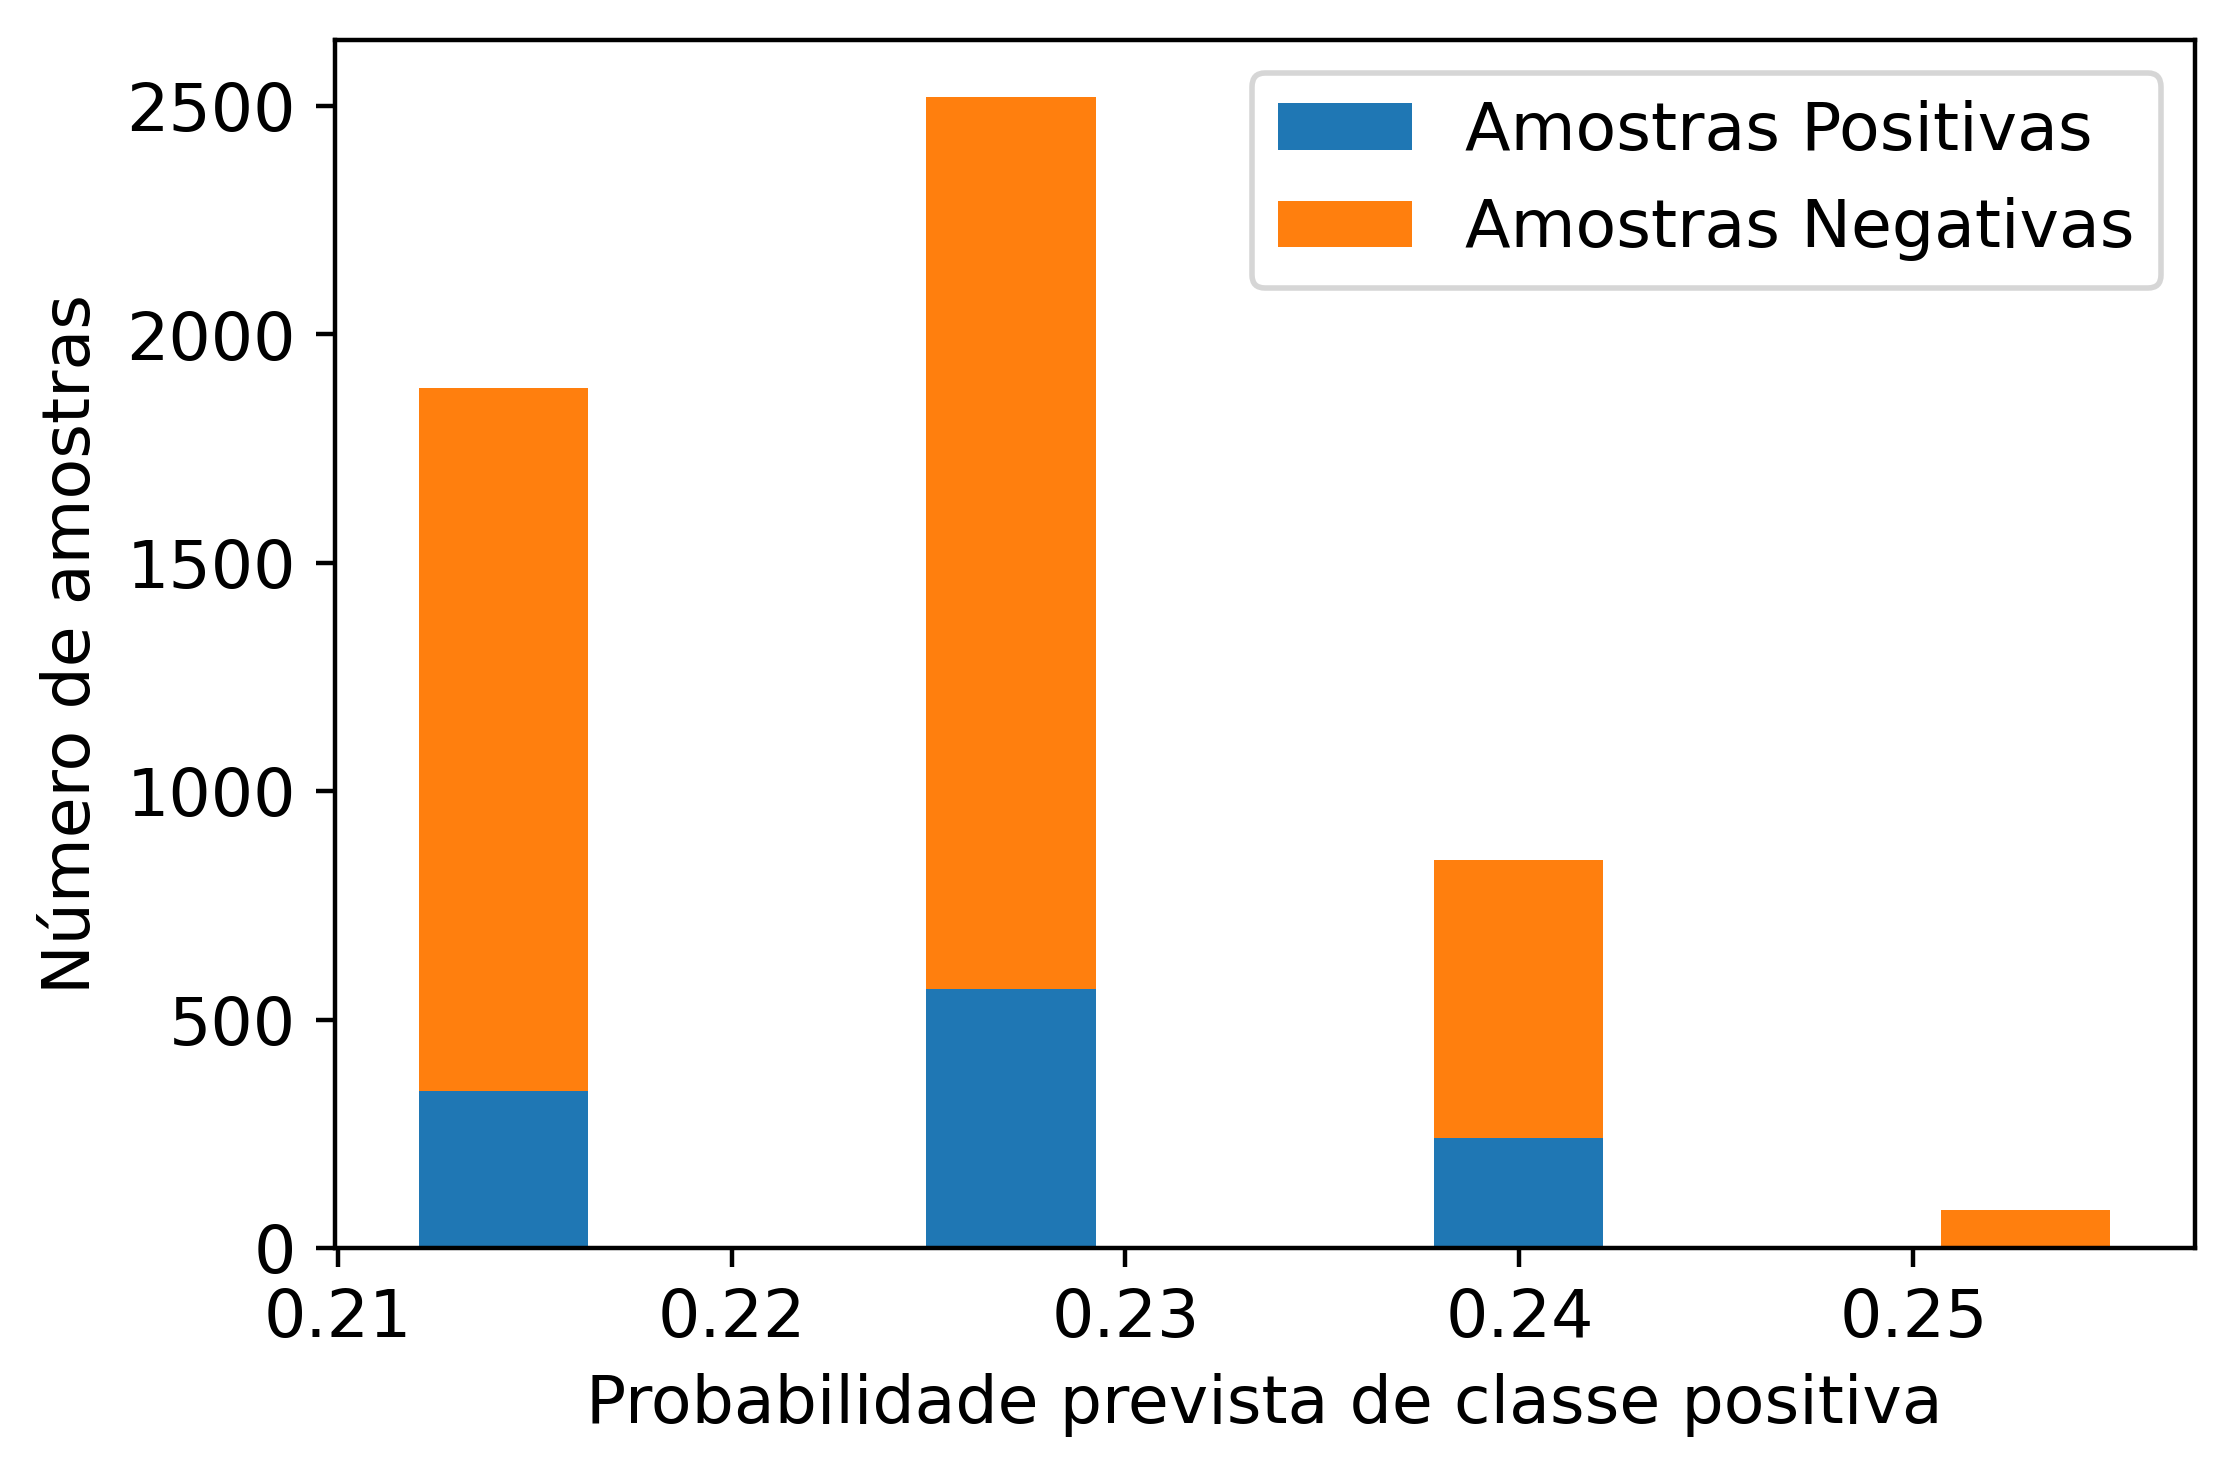

In [66]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Amostras Positivas', 'Amostras Negativas'])
plt.xlabel('Probabilidade prevista de classe positiva')
plt.ylabel('Número de amostras')

In [67]:
#código para usar o scikit-learn para gerar as matrizes de TPRs e FPRs para a curva ROC
fpr, tpr, thresholds = metrics.roc_curve (y_test, pos_proba)

Text(0.5, 1.0, 'Curva ROC')

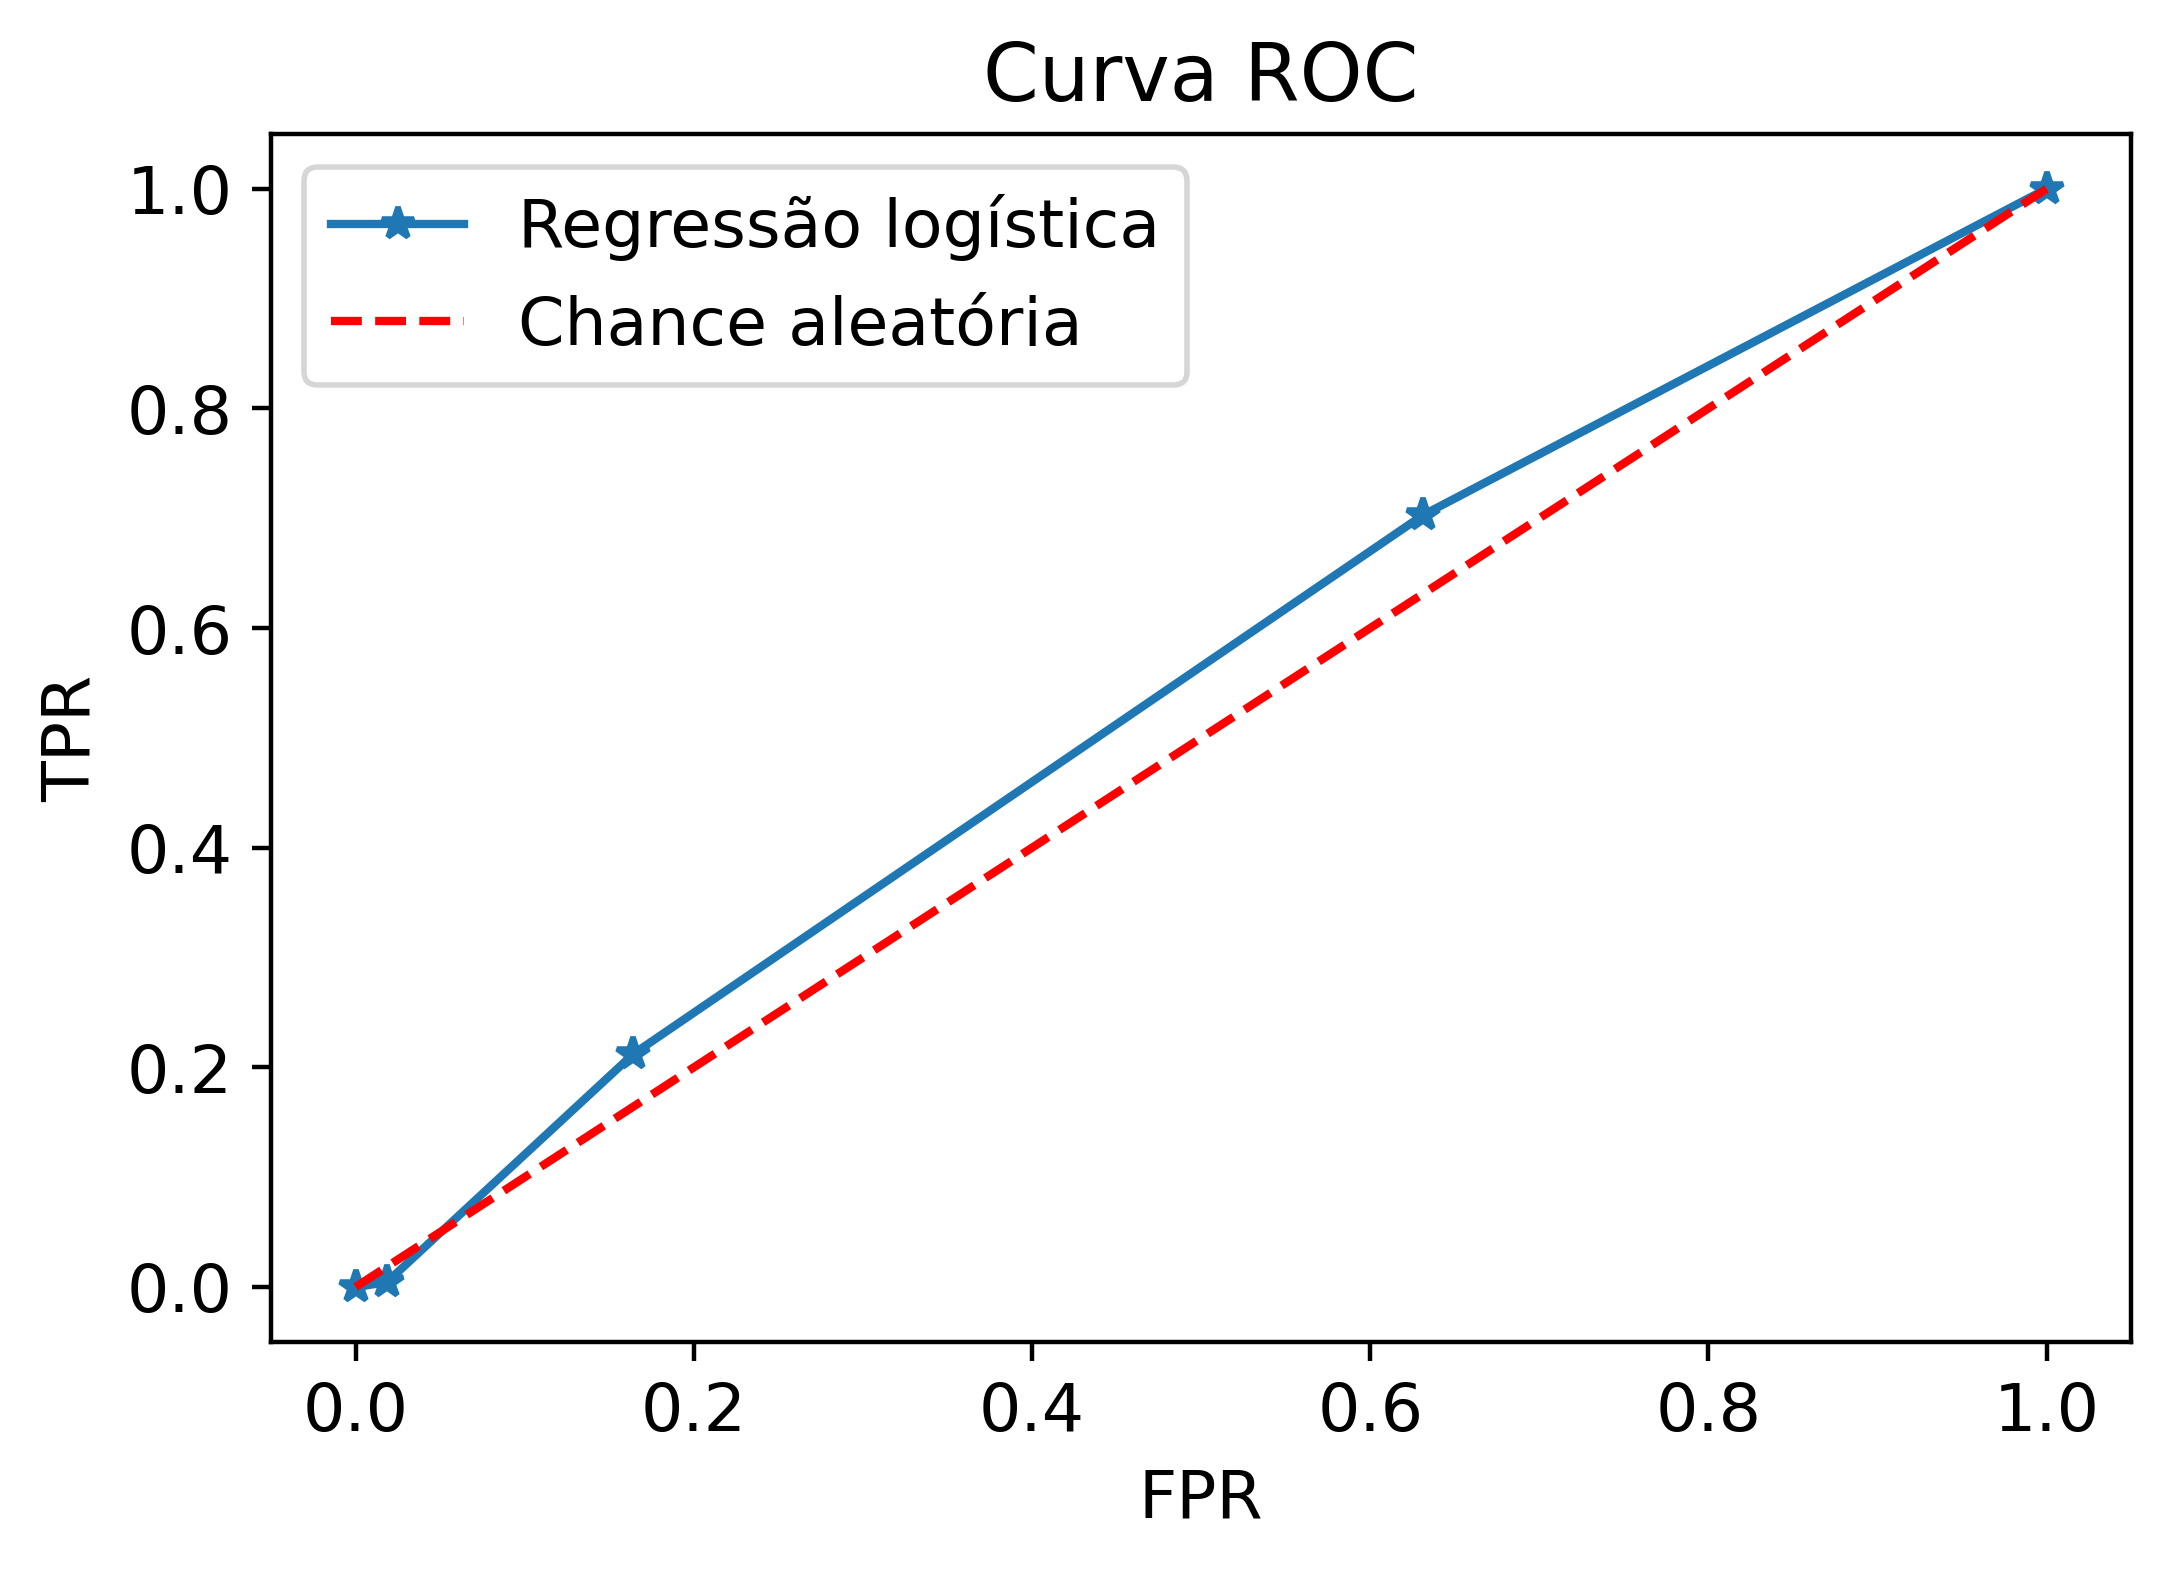

In [68]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Regressão logística', 'Chance aleatória'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')

In [69]:
thresholds #vendo os limites usados para calcular a curva ROC

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [70]:
metrics.roc_auc_score(y_test,pos_proba) #calculando a area do ROC

0.5434650477972642

In [71]:
#atividade 2 - 1)criando um novo conjunto de dados de treinamento e teste
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [72]:
# 2)Treine um modelo de regressão logística usando os dados de treinamento de sua divisão
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [73]:
# 3)Crie a matriz de probabilidades previstas para os dados de teste.
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [74]:
# 4)Calcule o ROC AUC usando as probabilidades previstas e os rótulos verdadeiros dodados de teste. 
#Compare isso com o ROC AUC usando o recurso EDUCAÇÃO 
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [75]:
# 5)trace a curva ROC
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

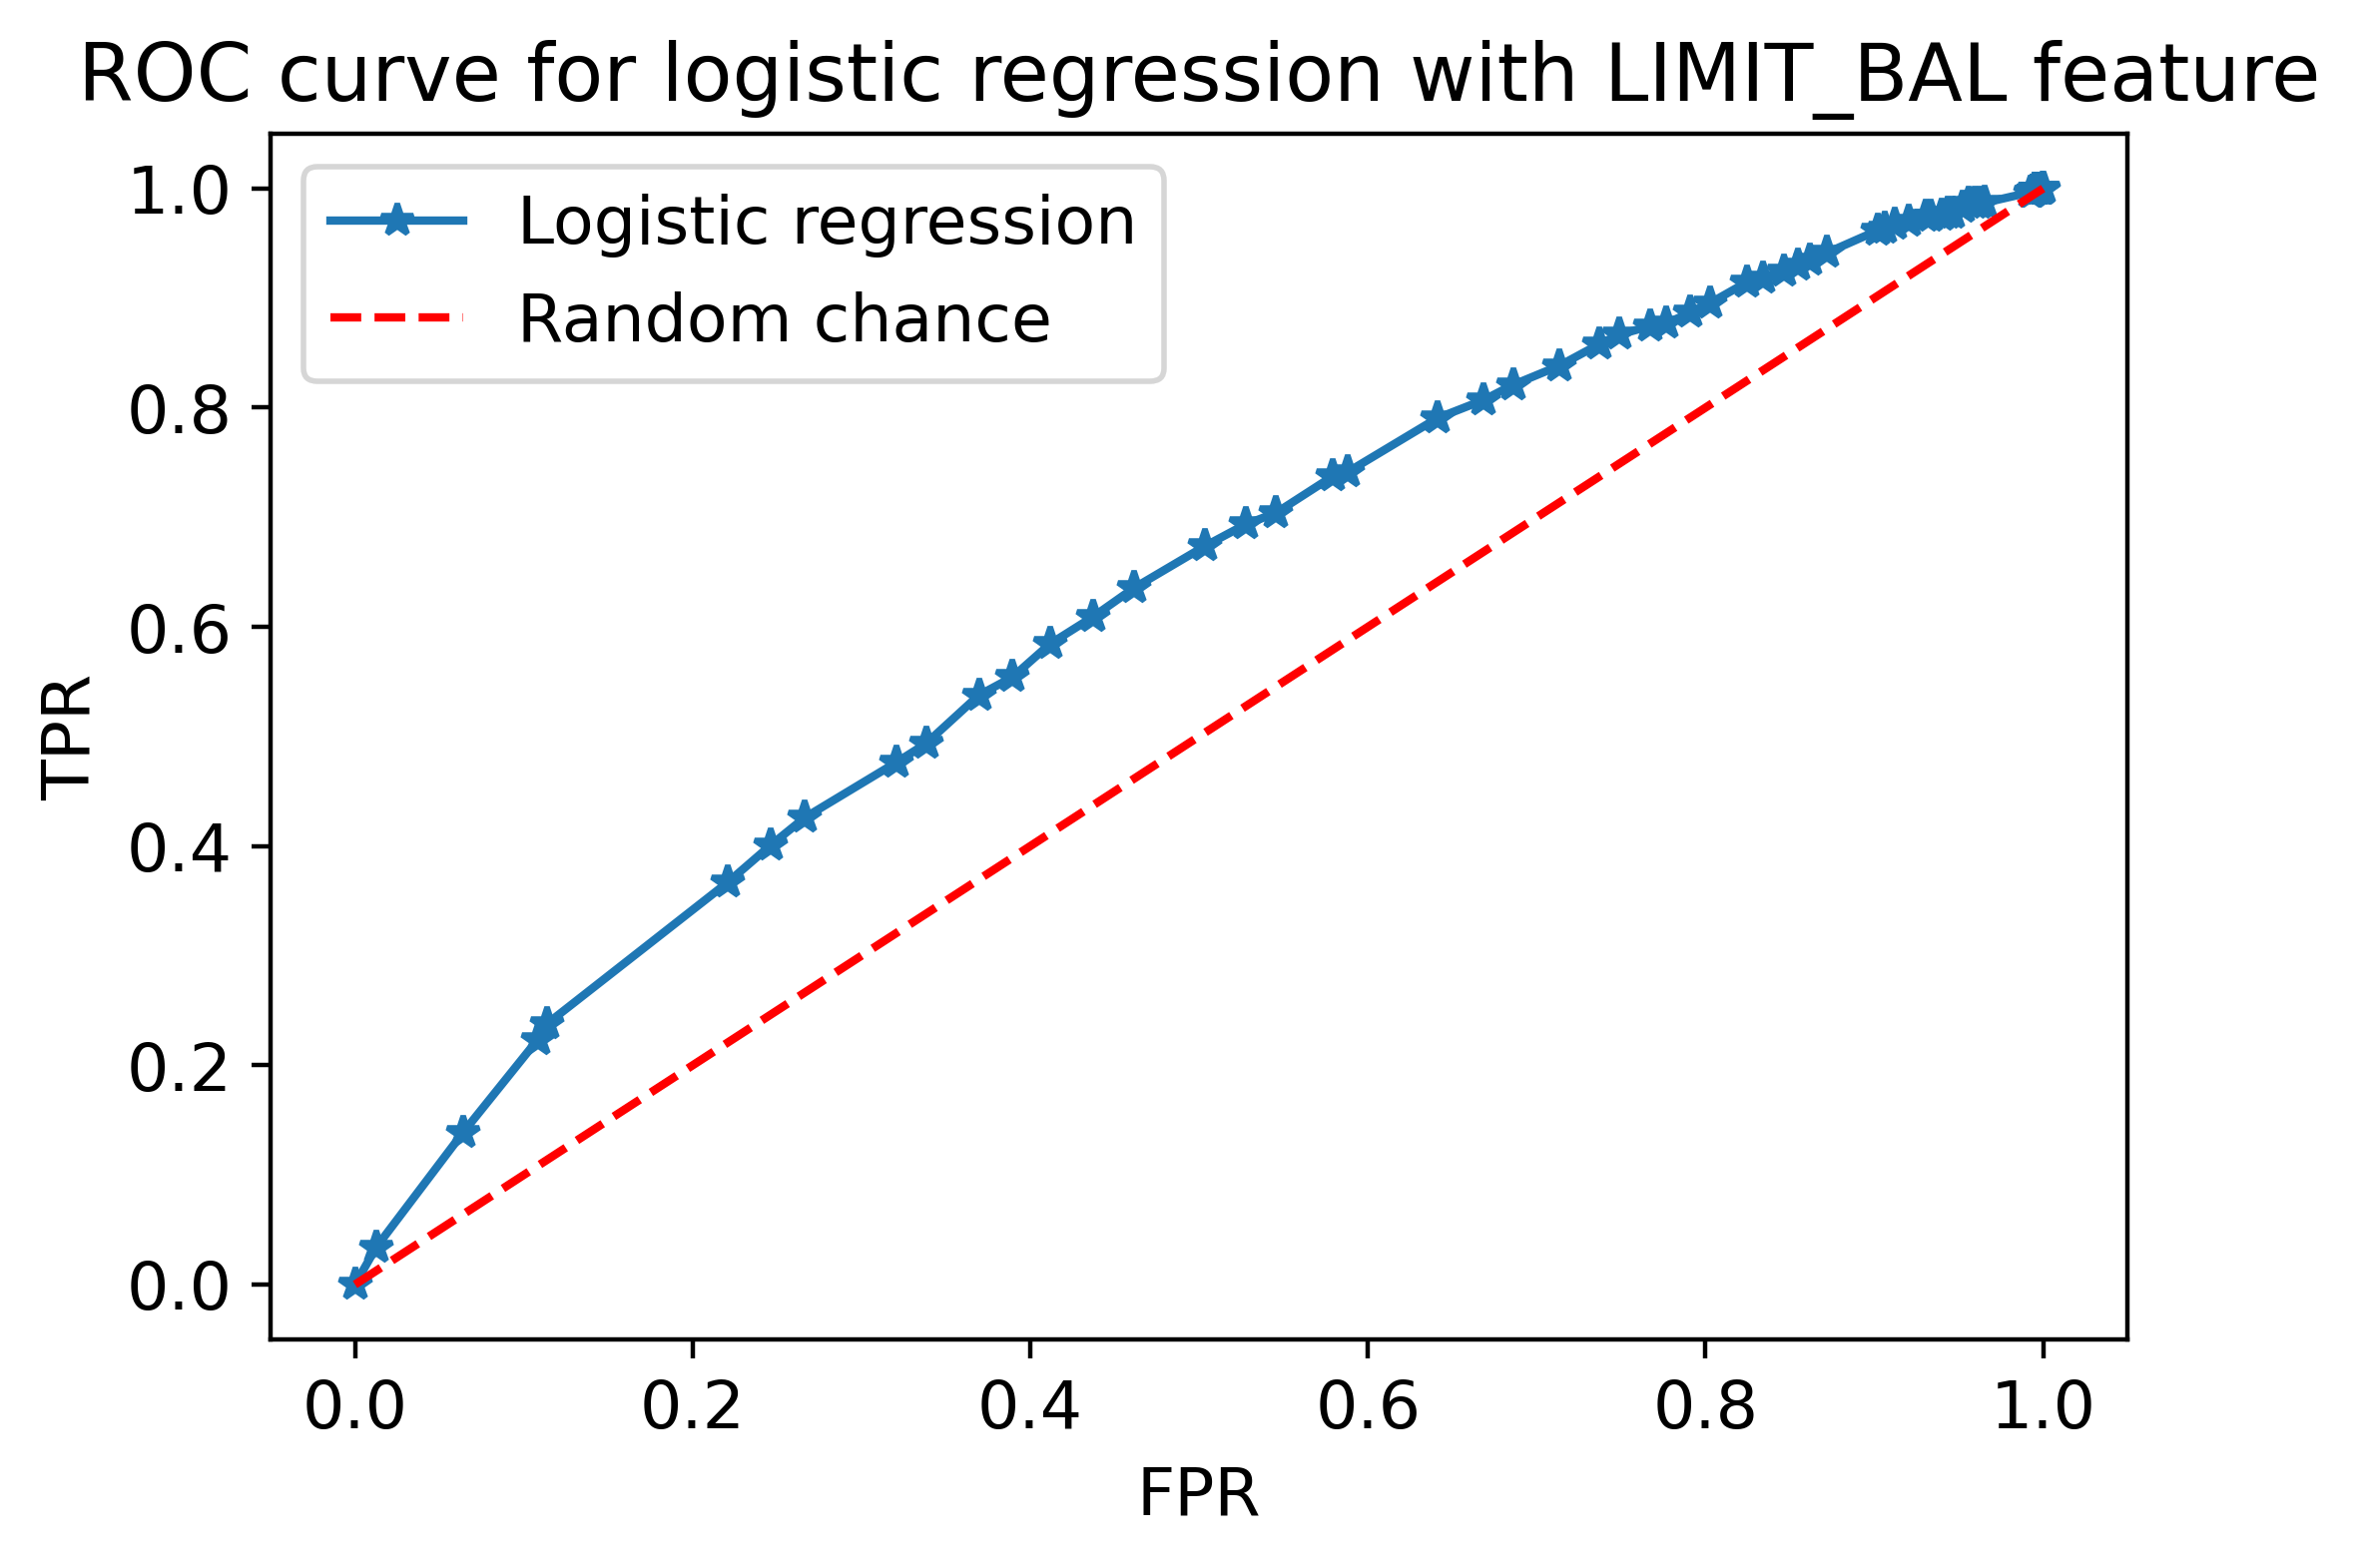

In [76]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [77]:
# 6)Calcule os dados para a curva de recuperação de precisão nos dados de teste usando o scikit-aprender a funcionalidade
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

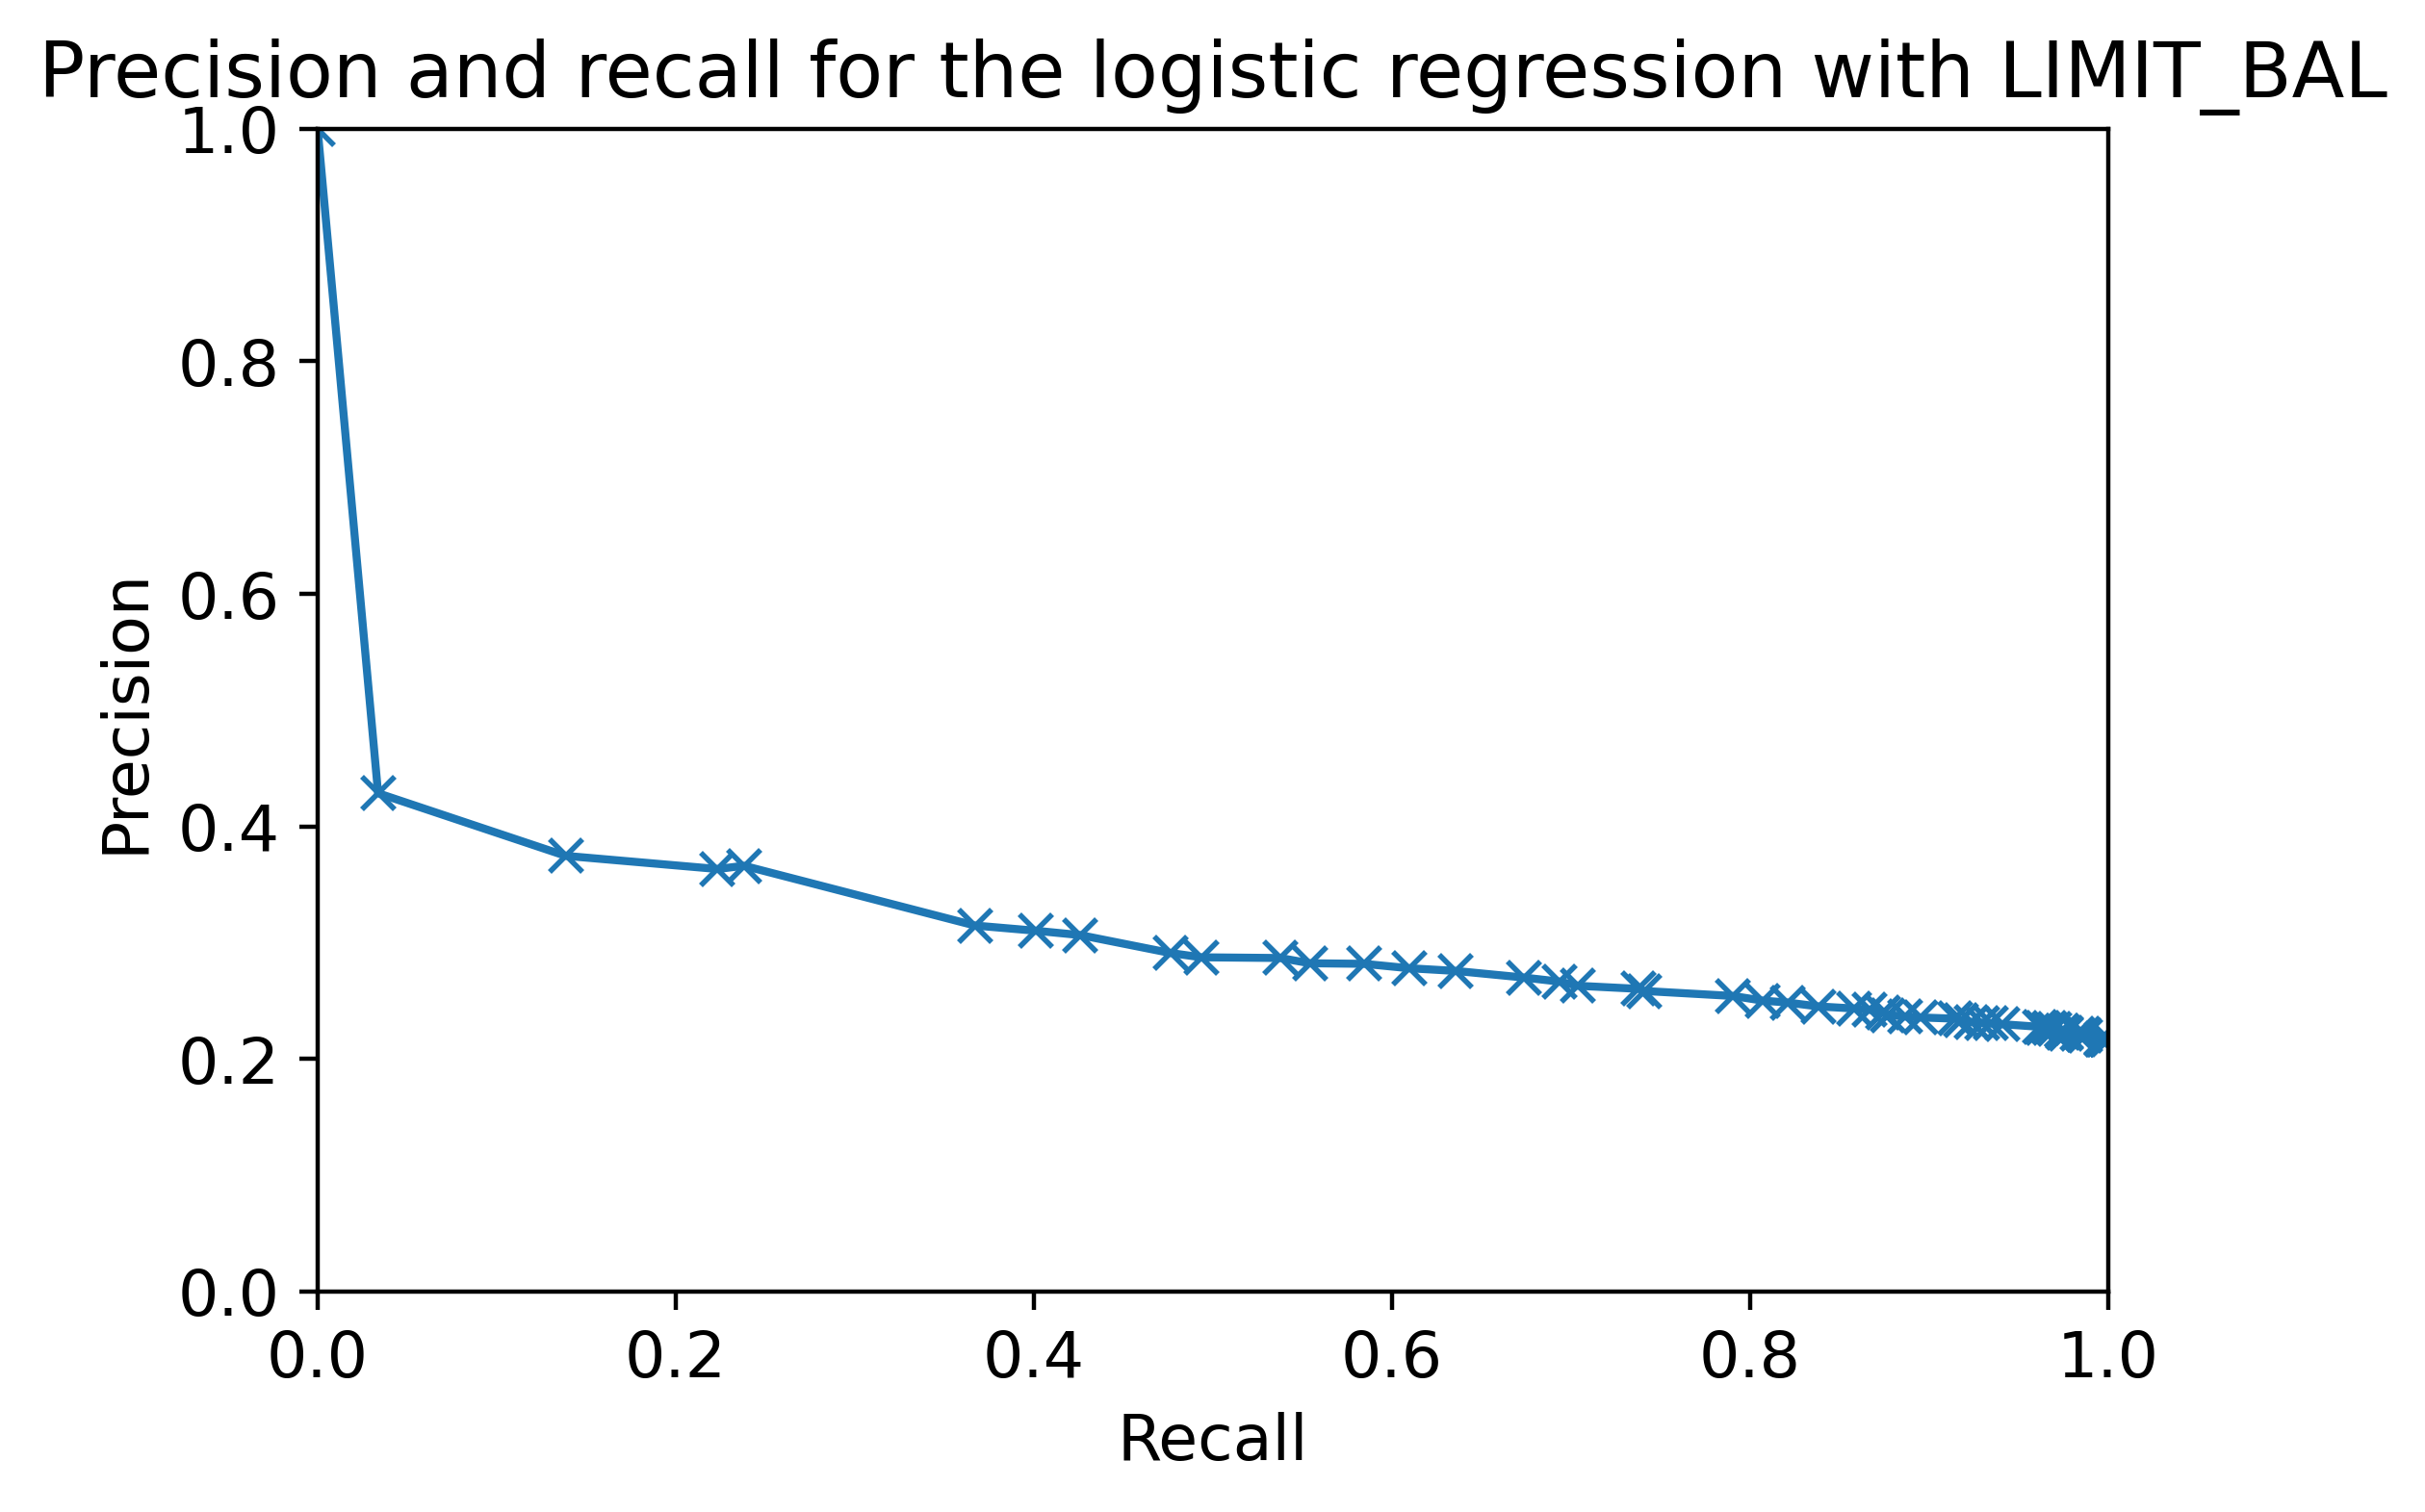

In [78]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [79]:
# 7)Trace a curva de recuperação de precisão usando matplotlib.
metrics.auc(recall, precision)

0.31566964427378624

In [80]:
# 8)Use o scikit-learn para calcular a área sob a curva de recuperação de precisão
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [81]:
# 9)Agora recalcule o ROC AUC, mas desta vez faça isso para os dados de treinamento. 
#Como ét ão diferente, conceitualmente e quantitativamente, de seu cálculo anterior?
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344